# Exercises week 35

## Deriving and Implementing Ordinary Least Squares

This week you will be deriving the analytical expressions for linear regression, building up the model from scratch. This will include taking several derivatives of products of vectors and matrices. Such derivatives are central to the optimization of many machine learning models. Although we will often use automatic differentiation in actual calculations, to be able to have analytical expressions is extremely helpful in case we have simpler derivatives as well as when we analyze various properties (like second derivatives) of the chosen cost functions.

Vectors are always written as boldfaced lower case letters and matrices as upper case boldfaced letters. You will find useful the notes from week 35 on derivatives of vectors and matrices. See also the textbook of Faisal at al, chapter 5 and in particular sections 5.3-5.5 at <https://github.com/CompPhysics/MachineLearning/blob/master/doc/Textbooks/MathMLbook.pdf>

### Learning goals

After completing these exercises, you will know how to
- Take the derivatives of simple products between vectors and matrices
- Implement OLS using the analytical expressions
- Create a feature matrix from a set of data
- Create a feature matrix for a polynomial model
- Evaluate the MSE score of various model on training and test data, and comparing their performance

### Deliverables

Complete the following exercises while working in a jupyter notebook. Then, in canvas, include
- The jupyter notebook with the exercises completed
- An exported PDF of the notebook (https://code.visualstudio.com/docs/datascience/jupyter-notebooks#_export-your-jupyter-notebook)

## How to take derivatives of Matrix-Vector expressions

In these exercises it is always useful to write out with summation indices the various quantities. Take also a look at the weekly slides from week 35 and the various examples included there.

As an example, consider the function

$$
f(\boldsymbol{x}) =\boldsymbol{A}\boldsymbol{x},
$$

which reads for a specific component $f_i$ (we define the matrix $\boldsymbol{A}$ to have dimension $n\times n$ and the vector $\boldsymbol{x}$ to have length $n$)

$$
f_i =\sum_{j=0}^{n-1}a_{ij}x_j,
$$

which leads to

$$
\frac{\partial f_i}{\partial x_j}= a_{ij},
$$

and written out in terms of the vector $\boldsymbol{x}$ we have

$$
\frac{\partial f(\boldsymbol{x})}{\partial \boldsymbol{x}}= \boldsymbol{A}.
$$

## Exercise 1 - Finding the derivative of Matrix-Vector expressions

**a)** Consider the expression

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}},
$$

Where $\boldsymbol{a}$ and $\boldsymbol{x}$ are column-vectors with length $n$.

What is the *shape* of the expression we are taking the derivative of?

What is the *shape* of the thing we are taking the derivative with respect to?

What is the *shape* of the result of the expression?

**b)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{x})}{\partial \boldsymbol{x}} = \boldsymbol{a}^T,
$$

**c)** Show that

$$
\frac{\partial (\boldsymbol{a}^T\boldsymbol{A}\boldsymbol{a})}{\partial \boldsymbol{a}} = \boldsymbol{a}^T(\boldsymbol{A}+\boldsymbol{A}^T),
$$

##### Answers:
**a)** **i)** The product $\mathbf{a}^T \mathbf{x}$ is the same as the inner product of $\mathbf{a}$ and $\mathbf{x}$ and gives a scalar.

**ii)** The variable $\mathbf{x}$ is a column vector of some length $n \in \mathbb{N}$

**iii)** The resulting expression is a *row* vector of length $n$, equal to the length of the *column* vector $\mathbf{x}$.

**b)** We have that $\mathbf{a}^T\mathbf{x} = a_1 x_1 + a_2 x_2 + \dots + a_n x_n$, were $a_i$ and $x_i$ is the $i$-th entry of $\mathbf{a}$ and $\mathbf{x}$ respectively. Taking the partial derivative with respect to $x_i$ gives
$$ \frac{\partial (\mathbf{a}^T\mathbf{x})}{\partial x_i} = a_i. $$
Consequently, taking the partial derivative w.r.t $\mathbf{x}$ we get a row vector where the $i$-th entry is $a_i$. This is exactly $\mathbf{a}^T$.

**c)** Denote the $i$-th entry of $\mathbf{a}$ by $a_i$ and the entry in the $i$-th row and $j$-th column of $\mathbf{A}$ by $x_{ij}$. Then the product $\mathbf{A}\mathbf{a}$ gives a column vector where the $k$-th entry is given by
$ \sum_{i=0}^{n} a_i x_{ki}$. Thus $\mathbf{a}^T\mathbf{A}\mathbf{a}$ is a scalar given by
$$ a_1 \left(\sum_{i=0}^{n} a_i x_{1i}\right) + a_2 \left(\sum_{i=0}^{n} a_i x_{2i} \right)  + \dots + a_n \left( \sum_{i=0}^{n} a_i x_{ni} \right).$$
Taking the partial derivative with respect to $a_k$ yields
$$ \begin{align} 
 \frac{\partial (\mathbf{a}^T\mathbf{A}\mathbf{a})}{\partial a_k} &= \sum_{i=1}^{n} a_i x_{ki} + \sum_{i=1}^{n} a_i x_{ik} = \mathbf{a}^T(\mathbf{A}+\mathbf{A}^T)
\end{align} $$

## Exercise 2 - Deriving the expression for OLS

The ordinary least squares method finds the parameters $\boldsymbol{\theta}$ which minimizes the squared error between our model $\boldsymbol{X\theta}$ and the true values $\boldsymbol{y}$.

To find the parameters $\boldsymbol{\theta}$ which minimizes this error, we take the derivative of the squared error expression with respect to $\boldsymbol{\theta}$, and set it equal to 0.

**a)** Very briefly explain why the approach above finds the parameters $\boldsymbol{\theta}$ which minimizes this error.

We typically write the squared error as

$$
\vert\vert\boldsymbol{y} - \boldsymbol{X\theta}\vert\vert^2
$$

which we can rewrite in matrix-vector form as

$$
\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)^T\left(\boldsymbol{y}-\boldsymbol{X}\boldsymbol{\theta}\right)
$$

**b)** If $\boldsymbol{X}$ is invertible, what is the expression for the optimal parameters $\boldsymbol{\theta}$? (**Hint:** Don't compute any derivatives, but solve $\boldsymbol{X\theta}=\boldsymbol{y}$ for $\boldsymbol{\theta}$)

**c)** Show that

$$
\frac{\partial \left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)}{\partial \boldsymbol{s}} = -2\left(\boldsymbol{x}-\boldsymbol{A}\boldsymbol{s}\right)^T\boldsymbol{A},
$$

**d)** Using the expression from **c)**, but substituting back in $\boldsymbol{\theta}$, $\boldsymbol{y}$ and $\boldsymbol{X}$, find the expression for the optimal parameters $\boldsymbol{\theta}$ in the case that $\boldsymbol{X}$ is not invertible, but $\boldsymbol{X^T X}$ is, which is most often the case.

$$
\boldsymbol{\hat{\theta}_{OLS}} = ...
$$

#### Answers:
**a)** This method finds the extrema of the squared error w.r.t. $\theta$ and since the expression is squared the extrema must be a minimum. Thus the resulting equation can be solved for $\theta$ to find the value of $\theta$ at that minimizes the squared error.

**b)** If $\mathbf{X}$ is invertible then we can multiply both sides with the inverse giving $\mathbf{X}^{-1}y-\theta = 0$, thus $\theta = \mathbf{X}^{-1}y$

**c)** By using the chain rule we can compute the derivative by first finding $\frac{\partial \mathbf{u}^T \mathbf{u}}{\partial \mathbf{u}}$, where $\mathbf{u} = \mathbf{x}-\mathbf{As}$ is a function of $\mathbf{s}$, and then finding $\frac{\partial \mathbf{u}}{\partial s}$. By 1c) We have that $\frac{\partial \mathbf{u}^T \mathbf{u}}{\partial \mathbf{u}} = \mathbf{u}^T(\mathbf{I} + \mathbf{I}^T)=2\mathbf{u}^T$. In the case of $\frac{\partial \mathbf{u}}{\partial \mathbf{s}}$ we have that the $\mathbf{x}$ term vanishes and we are left with a column vector whose $k$-th entry is given by $-\sum_{i=1}^{n} a_{ki}s_i$. When taking the partial derivative of this w.r.t. $s_i$ we are left with only $-a_{ki}$. Thus the $k$-th row and $i$-th column has entry $-a_{ki}$ which gives exactly the matrix $-\mathbf{A}$. Thus, $\frac{\partial \mathbf{u}}{\partial\mathbf{s}} = -\mathbf{A}$. Consequently, $\frac{\partial (\mathbf{x}-\mathbf{As})^T(\mathbf{x}-\mathbf{As})}{\partial s} = -2(\mathbf{x}-\mathbf{As})^T$.

**d)** We solve for \theta: 
$$\begin{align*}
2(\mathbf{y}-\mathbf{X\theta})^T\mathbf{X} =& \mathbf{y}^T\mathbf{X}-\mathbf{\theta}^T\mathbf{X}^T\mathbf{X} = 0\\
\iff  \theta^T =& \mathbf{y}^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1}\\
\iff \hspace{2mm} \theta =& ((\mathbf{X}^T\mathbf{X})^{-1})^T\mathbf{X}^T\mathbf{y}
\end{align*}$$

## Exercise 3 - Creating feature matrix and implementing OLS using the analytical expression

With the expression for $\boldsymbol{\hat{\theta}_{OLS}}$, you now have what you need to implement OLS regression with your input data and target data $\boldsymbol{y}$. But before you can do that, you need to set up you input data as a feature matrix $\boldsymbol{X}$.

In a feature matrix, each row is a datapoint and each column is a feature of that data. If you want to predict someones spending based on their income and number of children, for instance, you would create a row for each person in your dataset, with the montly income and the number of children as columns.

We typically also include an intercept in our models. The intercept is a value that is added to our prediction regardless of the value of the other features. The intercept tries to account for constant effects in our data that are not dependant on anything else. In our current example, the intercept could account for living expenses which are typical regardless of income or childcare expenses.

We calculate the optimal intercept by including a feature with the constant value of 1 in our model, which is then multplied by some parameter $\theta_0$ from the OLS method into the optimal intercept value (which will be $\theta_0$). In practice, we include the intercept in our model by adding a column of ones to the start of our feature matrix.

In [1]:
import numpy as np

In [2]:
n = 20
income = np.array([116., 161., 167., 118., 172., 163., 179., 173., 162., 116., 101., 176., 178., 172., 143., 135., 160., 101., 149., 125.])
children = np.array([5, 3, 0, 4, 5, 3, 0, 4, 4, 3, 3, 5, 1, 0, 2, 3, 2, 1, 5, 4])
spending = np.array([152., 141., 102., 136., 161., 129.,  99., 159., 160., 107.,  98., 164., 121.,  93., 112., 127., 117.,  69., 156., 131.])


**a)** Create a feature matrix $\boldsymbol{X}$ for the features income and children, including an intercept column of ones at the start.

In [3]:
X = np.zeros((n, 3))
X[:, 0] = np.ones(n)
X[:, 1] = income
X[:, 2] = children

**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting spending based on these features. Create a function for this operation, as you are going to need to use it a lot.

In [9]:
def OLS_parameters(X, y):
    return (y.T @ X @ np.linalg.pinv(X.T @ X)).T

y = spending
beta = OLS_parameters(X, y)
print(beta)

[ 9.12808583  0.5119025  14.60743095]


## Exercise 4 - Fitting a polynomial

In this course, we typically do linear regression using polynomials, though in real world applications it is also very common to make linear models based on measured features like you did in the previous exercise.

When fitting a polynomial with linear regression, we make each polynomial degree($x, x^2, x^3, ..., x^p$) its own feature.

In [154]:
n = 100
x = np.linspace(-3, 3, n)
y = np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, 0.2, n)

**a)** Create a feature matrix $\boldsymbol{X}$ for the features $x, x^2, x^3, x^4, x^5$, including an intercept column of ones at the start. Make this into a function, as you will do this a lot over the next weeks.

In [137]:
def polynomial_features(x, p):
    n = len(x)
    X = np.ones((n, p + 1))
    for i in range(p):
        X[:,i+1] = x**(i+1)
    return X
        

X = polynomial_features(x, 5)


**b)** Use the expression from **3d)** to find the optimal parameters $\boldsymbol{\hat{\beta}_{OLS}}$ for predicting $\boldsymbol{y}$ based on these features. If you have done everything right so far, this code will not need changing.

In [138]:
beta = OLS_parameters(X, y)
print(beta)

[ 8.44440453e-01  2.45567007e-01 -4.77440305e-02  7.01782875e-02
 -3.68791279e-04 -1.04646490e-02]


**c)** Like in exercise 4 last week, split your feature matrix and target data into a training split and test split.

In [139]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

**d)** Train your model on the training data(find the parameters which best fit) and compute the MSE on both the training and test data.

In [144]:
from functools import partial
from sklearn.metrics import mean_squared_error

model_params = OLS_parameters(X_train,y_train)
print("params:", model_params)

def model_func(params, x):
    prediction = 0
    for i, theta in enumerate(params):
        if i == 0:
            prediction += theta
        else:
            prediction += theta*(x**i)
    return prediction

predict_train = model_func(model_params, X_train[:,1])
train_mse = mean_squared_error(y_train, predict_train)

predict_test = model_func(model_params, X_test[:,1])
test_mse = mean_squared_error(y_test, predict_test)

print("train mse:", train_mse)
print("test mse:", test_mse)



params: [ 8.36490123e-01  2.71130964e-01 -4.74048702e-02  5.78452679e-02
 -6.25055513e-04 -9.48855003e-03]
train mse: 0.023342232542669462
test mse: 0.025682980282606023


**e)** Do the same for each polynomial degree from 2 to 10, and plot the MSE on both the training and test data as a function of polynomial degree. The aim is to reproduce Figure 2.11 of [Hastie et al](https://github.com/CompPhysics/MLErasmus/blob/master/doc/Textbooks/elementsstat.pdf). Feel free to read the discussions leading to figure 2.11 of Hastie et al. 

In [145]:
max_degree = 10
min_degree = 2

num_points = max_degree - min_degree + 1

# initialize arrays for MSE arrays
MSE_train_degs = np.zeros(num_points)
MSE_test_degs = np.zeros(num_points)
# initialize array to plot models
model_output_plots = np.zeros((num_points, n))

xs_train, xs_test, ys_train, ys_test = train_test_split(x, y, test_size=0.2)

for d in range(min_degree, max_degree+1):
    # calculate model parameters
    xs_train_features = polynomial_features(xs_train, d)
    beta_ = OLS_parameters(xs_train_features, ys_train)

    # get MSE for train and test
    predict_train_ = model_func(beta_, xs_train)
    train_mse_ = mean_squared_error(ys_train, predict_train_)
    MSE_train_degs[d-min_degree] = train_mse_

    predict_test_ = model_func(beta_, xs_test)
    test_mse_ = mean_squared_error(ys_test, predict_test_)
    MSE_test_degs[d-min_degree] = test_mse_

    # get model output for all x to plot.
    model_output_plots[d-min_degree] = model_func(beta_, x)


degrees = list(range(min_degree, max_degree+1))
print(MSE_train_degs)
print(MSE_test_degs)

[0.08610207 0.05214535 0.05181792 0.0491371  0.04215246 0.04082496
 0.03040594 0.02898507 0.02837905]
[0.09283332 0.06348555 0.0634107  0.06153667 0.06058239 0.05473119
 0.05509697 0.07245298 0.06708903]


In [ ]:
import matplotlib.pyplot as plt

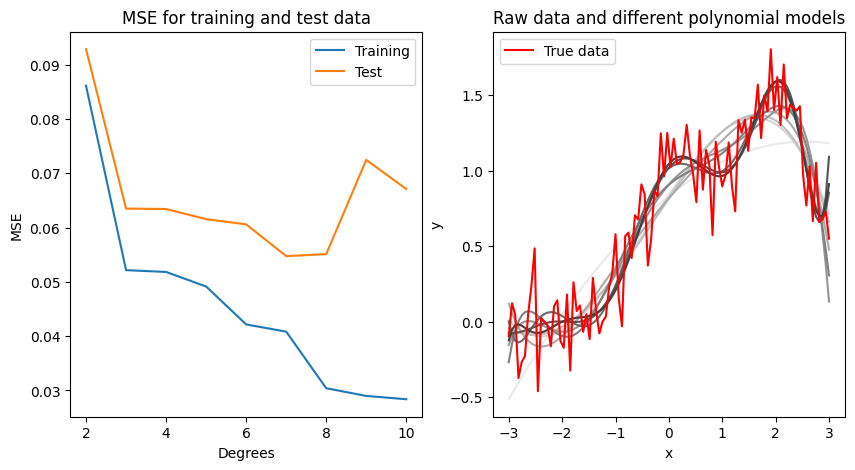

In [151]:
fig, (ax1, ax2) =  plt.subplots(1,2)
fig.set_figheight(5)
fig.set_figwidth(10)

#ax1.set_aspect("equal")
#ax2.set_aspect("equal")

ax1.plot(degrees, MSE_train_degs, label="Training")
ax1.plot(degrees, MSE_test_degs, label="Test")
ax1.set_xlabel("Degrees")
ax1.set_ylabel("MSE")
ax1.set_title(f"MSE for training and test data")
ax1.legend()

for i, poly in enumerate(model_output_plots):
    # plot each polynomial model in different shade of grey.
    # from lighter to darker grey with increasing degree.
    ax2.plot(x, poly, color =((11-i)/12, (11-i)/12, (11-i)/12))

ax2.plot(x,y, label="True data", color="red")

ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.set_title("Raw data and different polynomial models")
ax2.legend()

**f)** Interpret the graph. Why do the lines move as they do? What does it tell us about model performance and generalizability?

The graph shows that increasing the degree of the polynomial decreases the error of the predictions on both the training and test data up to a point. After this point increasing the degree of the polynomial decreases the error of the predictions on the training data further but increases the error of the prediction on the test data significantly. This means the model performs better for the training data but worse for the unseen test data.

This implies the model actually gets worse at predicting future observations when the degree of the polynomial, and thereby the complexity of the model, increases past a certain point. 

This happens because the model is overfitting and, losely speaking, is taking into account the noise of the particular observations in the training data and not only considering the overall trends.

## Exercise 5 - Comparing your code with sklearn

When implementing different algorithms for the first time, it can be helpful to double check your results with established implementations before you go on to add more complexity.

**a)** Make sure your `polynomial_features` function creates the same feature matrix as sklearns PolynomialFeatures.

(https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html)

In [155]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [198]:
x = np.linspace(0,5,11)
y = np.log(x+1)

def validate_poly(d_min, d_max, x, y, print_on=False):
    n = d_max-d_min+1
    test_bools = np.zeros((n,1), dtype="bool")
    
    for deg in range(d_min,d_max+1):
        Xs_sklearn = PolynomialFeatures(deg).fit_transform(x.reshape(11,1),y)
        Xs_own = polynomial_features(x, deg)
        # Check all entries are equal.
        is_equal = np.all(Xs_sklearn == Xs_own)
        test_bools[deg-d_min] = is_equal
        if not is_equal and print_on:
            print(f"Failed at degree {deg}!")
    
    return test_bools
        
    
validate_poly(2,10,x,y)

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

**b)** Make sure your `OLS_parameters` function computes the same parameters as sklearns LinearRegression with fit_intercept set to False, since the intercept is included in the feature matrix. Use `your_model_object.coef_` to extract the computed parameters.

(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

Text(0, 0.5, 'MSE (log)')

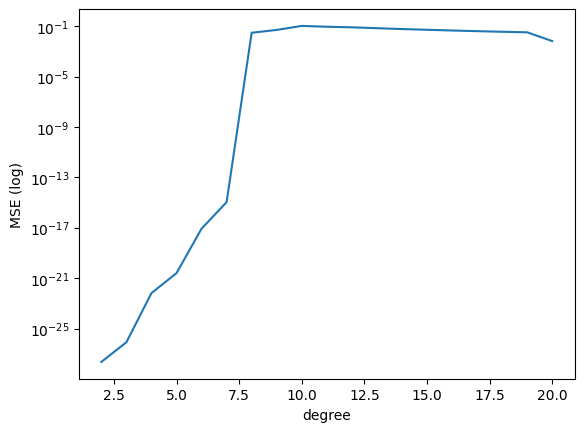

In [201]:
def validate_params(d_min, d_max, x, y, print_on=False):
    n = d_max-d_min+1
    test_result = np.zeros((n,1))
    
    for deg in range(d_min,d_max+1):
        Xs_sklearn = PolynomialFeatures(deg).fit_transform(x.reshape(11,1),y)
        model_sklearn = LinearRegression(fit_intercept = False).fit(Xs_sklearn, y)
        coeffs_sklearn = model_sklearn.coef_
        
        Xs_own = polynomial_features(x, deg)
        coeffs_own = OLS_parameters(Xs_own, y)

        mse = mean_squared_error(coeffs_own, coeffs_sklearn)
        test_result[deg-d_min] = mse
        
        if print_on:
            print(f"degree {d}", mse)
    
    return test_result

min_d = 2
max_d = 20
errors = validate_params(min_d,max_d,x,y)
degrees = list(range(min_d,max_d+1))

plt.plot(degrees, errors)
plt.yscale("log")
plt.xlabel("degree")
plt.ylabel("MSE (log)")

The difference is very small for small degrees but increases to quite high levels with higher degrees. But increases with degree. I would guess this is due to some numerical error and a difference in implementation. Unsure about how to fix this.